# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Samuel Leon

**Section**: (001 or ~~002~~)
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [20]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import pandas as pd
%matplotlib inline
import scipy.stats as scipy

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

$\int_0^{\pi}{sin(x)dx} = -cos(\pi) + cos(0)= -(-1) + 1 = 2$

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

If we have the box with X coordinates [0, $\pi$] and Y coordinates [0,1], and we compute the ratio of points that fall under the curve relative to all the points in the box, we would have the probability that the points fall under the curve in the specified interval. 

This ratio will compute to $\frac{2}{\pi}$.

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

 If we multiply the ratio by the total area of the box, we get the area under the curve: 
 
$\frac{2}{\pi} * \pi = 2$

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Variance: $\frac{1}{n-1}\sum_{i=0}^n(x_i - \bar{x_n})^2$

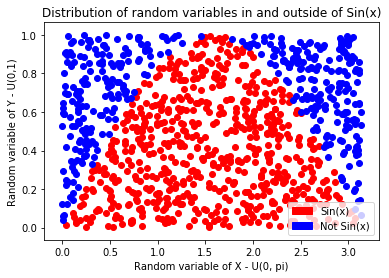

The estimate of the integral of Sin(x) with 1000 samples is: 1.929 and the Sample Variance is: 0.237


(1.928937889304133, 0.23700400000000002)

In [21]:
def f(x):
    return np.sin(x)

def integrate(num_samples=int(1e3), isPlot=False):
    x = []
    y = []
    funcX = []
    funcY = []
    num_curve = 0
    varList = []
    xV = yV = 0
    
    for i in range(num_samples): 
        xV = (np.random.uniform(0,np.pi)) #calculate an x value in our box
        yV = (np.random.uniform(0,1))     #calculate an y value in our box
        append_num = 0
        
        if(f(xV) >= yV): #If random variable is under the curve, we are going to increment number of items under curve
            funcX.append(xV)
            funcY.append(yV)
            
            num_curve += 1 #to calculate our ratio
            append_num = 1
        else:
            x.append(xV)
            y.append(yV)
            
        varList.append(append_num)

    ratio = num_curve / num_samples #ratio of values under curve to number of samples taken
    estimate = ratio * np.pi
    mean = np.mean(y)
    sample_var = np.var(varList)
    
    if isPlot == True:
        for elements in x:
            if elements in funcX:
                x.remove(elements)
        for elements in y:
            if elements in funcY:
                y.remove(elements)
                
        red_patch = mpatches.Patch(color='red', label='Sin(x)')
        blue_patch = mpatches.Patch(color='blue', label='Not Sin(x)')
        plt.scatter(funcX, funcY, color = 'red')
        plt.scatter(x, y, color = 'blue')
        
        
        
        plt.title("Distribution of random variables in and outside of Sin(x)")
        plt.ylabel("Random variable of Y - U(0,1)")
        plt.xlabel("Random variable of X - U(0, pi)")
        plt.legend(handles=[red_patch, blue_patch])
        plt.show()

    print("The estimate of the integral of Sin(x) with {} samples is: {} and the Sample Variance is: {}".format(num_samples,round(estimate, 3), round(sample_var, 5)))
    return estimate, sample_var 

integrate(1000, True)

In [22]:
integrate(10000)

The estimate of the integral of Sin(x) with 10000 samples is: 1.993 and the Sample Variance is: 0.23194


(1.9930263794373646, 0.23193664)

**At 100,000 samples, I consistently get the estimation to be within a few thousandths of the estimated value from part A (2).**

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

The parameters of the random variable are True/False: Either the values of our random variables are equal to or under Sin(x) (True/Red), or they're not (False/Blue), which is a boolean that can be represented from a bernoulli distribution (true/false) on each individual case, or a binomial distribution over a wider scale.

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

The Expectation of a single point is: 

E[x] = $\frac{2}{\pi}$

The Expectation of the area of points underneath the curve is therefore:

E[x] = $\frac{2}{\pi} * $ the area of the box, or: $\frac{2}{\pi}*\pi = 2$

This value agrees with the previously calculated value, therefore it is a good estimator.

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

The variance of a randomly distributed Bernoulli variable is: p.

Var(x) = $E[x^2] - E[x]^2 = p - p^2 = \frac{2}{\pi} - \frac{4}{\pi^2} = .231$

This variance is within 4 hundredths of the experimentally found variable. Therefore, I suspect this is accurate.

### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



Oh! If only I could be so ***grossly incandescent*** as that buffalo..
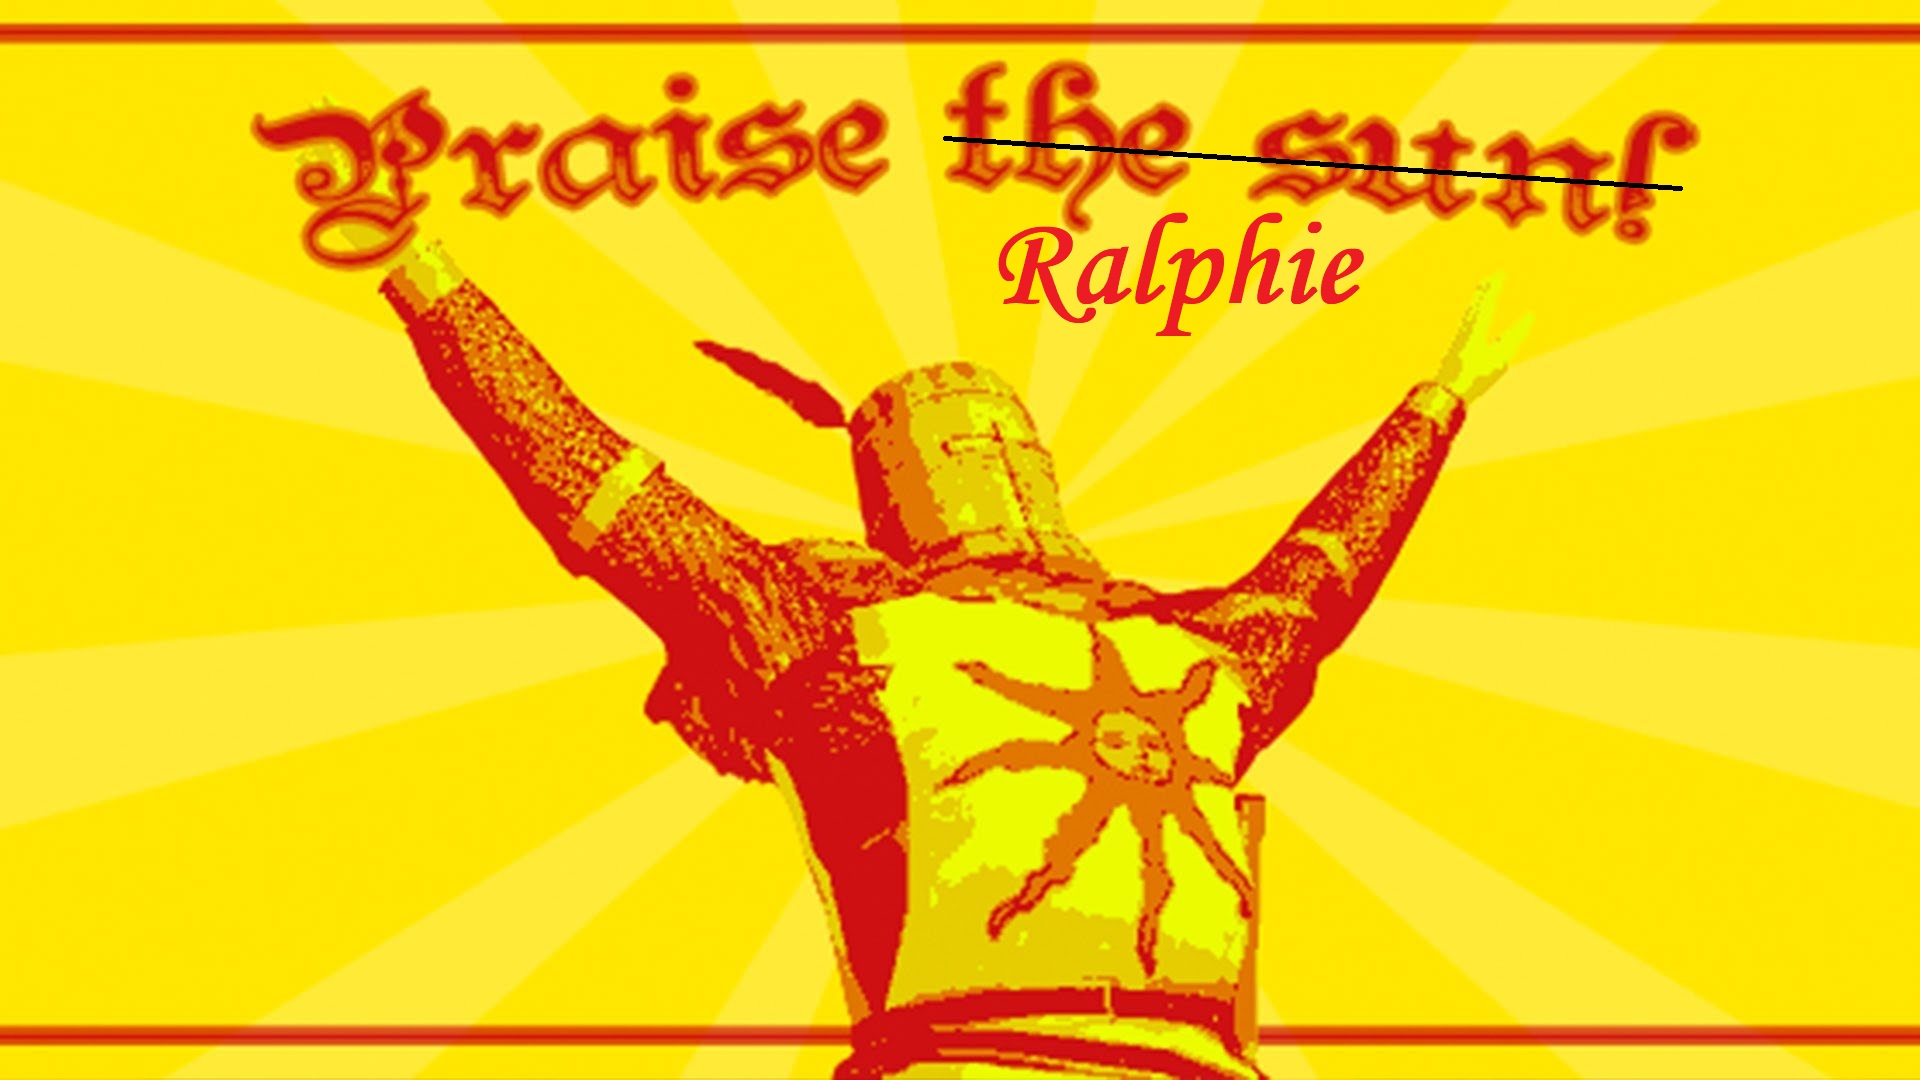.

**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?

In [23]:
z_prob = scipy.norm.cdf(-0.9128)
print(z_prob)

0.180673869166


$$Z = \frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$


$$Z = \frac{90-91}{\frac{6}{\sqrt{30}}} = -0.9128 $$

After looking this up in a table:

P = $0.180655$ or 

The probability that our hay is reject is: $$18.065\%$$

**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


In [31]:
z_score = scipy.norm.ppf(0.001)
print(z_score)

-3.09023230617


$$-3.09023230617 = \frac{90-\mu}{\frac{6}{\sqrt{30}}} = -0.9128 $$
$-\mu = -93.38517988404$



$\mu = 93.385$

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


$$-3.09023230617 = \frac{90-91}{\frac{6}{\sqrt{n}}}$$

Solving for n we get:

$$n = 343.78$$

Therefore, we will need to round up to a whole, as we cannot have a fractional part of hay. 

$$n = 344$$

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 

 


$$===================================================$$
$$=====::===========::===============================$$
$$==:::0::::::::::::0::::============================$$
$$==::::::::\__/:::::::::============================$$
$$==::::::::/::\:::::::::============================$$
$$======::::::::::::::::::::::::::::=================$$
$$======::::::::::::::::::::::::::::=================$$
$$======::::::::::::::::::::::::::::=================$$
$$======:::This is ralphie::::::::===================$$
$$======::::::::::::::::::::::::::::=================$$
$$======::::::::::::::::::::::::::::=================$$
$$=====.......=================.......===============$$
$$=====.......=================.......===============$$
$$=====.......=================.......===============$$
$$=====.......=================.......===============$$

Yes, I used a picture converter **FOR THE PHOTO ABOVE** COUGH HACK COUGH...ISNT IT BEAUTIFUL?

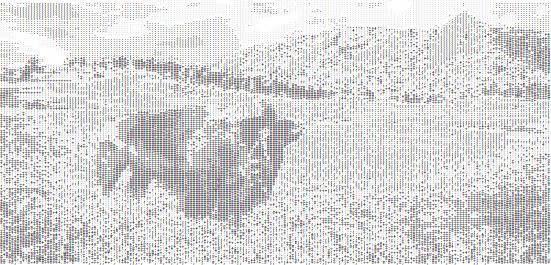

^Obviously this ...*amateurish* rendition of ralphie is hand made....

### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

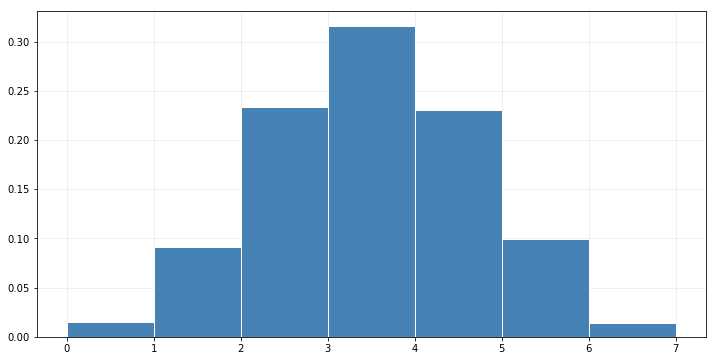

In [25]:
def plinkowobounds(num_trials = int(1e4), plot = False):
    results = []

    
    for trials in range(num_trials):
        position = 3
        for i in range(6):
            rand = np.random.choice([-1,1])
            position += rand*0.5       
        
        results.append(position)
        
    if plot == True:
        fig, ax = plt.subplots(figsize=(12,6))
        bins = np.arange(0,8, 1)
        plt.hist(results, normed = True, bins=bins, color = 'steelblue', edgecolor = 'white', width = 1)
        
        ax.grid(alpha=0.25)
        ax.set_axisbelow(True)
        
        plt.show()
        
plinkowobounds(10000, True)

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

$$f(X = x)=\cases{
    {6 \choose x}(\frac{1}{2})^x(\frac{1}{2})^{6-x}, ~\text{for}~0 \leq x \leq 6 \\ 
    0, ~\text{elsewhere}~
}$$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [36]:
def plinkowbounds(left_bound = .5, right_bound = 6, num_trials = int(1e3), plot = False):
    results = []    
    winnings = 0
    avg_winnings = 0
    for trials in range(num_trials):
        position = 3
        for i in range(6):
            if position == left_bound:
                rand = 1
            elif position == right_bound:
                rand = -1
            else:
                rand = np.random.choice([-1,1])
            position += rand*0.5       
        
        results.append(position)
        winnings += position
    avg_winnings = winnings/num_trials
    
        
    if plot == True:
        fig, ax = plt.subplots(figsize=(12,6))
        bins = np.arange(0,8, 1)
        plt.hist(results, normed = True, bins=bins, color = 'steelblue', edgecolor = 'white', width = 1)
        
        ax.grid(alpha=0.25)
        ax.set_axisbelow(True)
        
        plt.show()
    return avg_winnings
    
plinkowbounds(10000)

3.0569999999999999

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




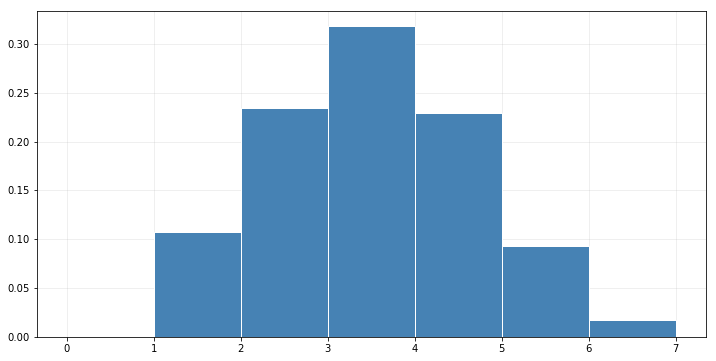

In [27]:
plinkowbounds(.5, 6, 10000, True)

By limiting the leftward boundaries of our Plinko board, we shift the probability to the next most leftward bin, in this case, from 0 to bin 1. This occurs due to the nature of PMF's (the probabilities must sum to 1).

However, in a practical consideration, if we were to put a boundary on Bin 0, the plinko disc would instead have to move right- as it would hit the wall and bounce rightward instead. In this case, that would result in a Bin 0-bound disc falling into Bin 1 instead, which would have the frequency of Bin 0's discs fall into 1 instead. 

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


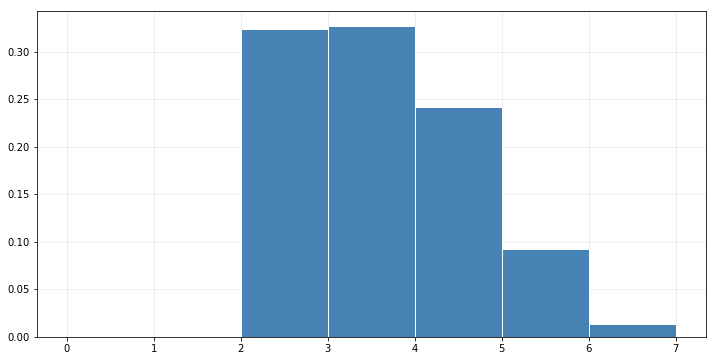

In [28]:
plinkowbounds(1.5, 6, 10000, True)

Once again, the seperate probabilities of all of our items in our PMF must sum to 1, and as such, the density of each bin will increase as we limit the lower range; as the plinko ball must land somewhere- and so the landings of the ball will be more highly distributed in the 2+ region, as 1.5 is an automatic right shift.

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




If we are careful about our observations, and our comparisons, we might notice that the slices from each Bin ($bin_0 \rightarrow bin_1$) will be roughly equal, so that the increase in each outer height (leftmost or rightmost) following an increase in the stringency of the bounds will be the same as the height of the previous bin removed. 

For Example, if I place a boundary at 0.5, the height of Bin 0 will be accumulated to Bin 1, or at 1.5, the height of Bin 1 will be placed into Bin 2. This will work the same on the righthand side.

With this mechanism we are baring witness to the displacement of probabilities throughout the distribution.

Our True PMF will be as follows:
Let L be the left bound, and R be the right bound.

**In a general case with no boundaries we have:**

$$f(X = x)=\cases{
    {6 \choose x}(\frac{1}{2})^x(\frac{1}{2})^{6-x}, ~\text{for}~0 \leq x \leq 6 \\ 
    0, ~\text{elsewhere}~
}$$


** In general, our true PMF with boundaries is: **

For a case with a left boundary, L = .5 and a right boundary, R = 5.5:

Let p be the probability that we move right (p)
Let q be the probability that we move left (1-p)

In this case, p = $\frac{1}{2}$


$$f(X = x)=\cases{
    p, ~\text{for}~ x = L \\
    q, ~\text{for}~ x = R \\
    {6 \choose x}(p)^x(q)^{6-x}, ~\text{for}~ L < x < R \\ 
    0, ~\text{elsewhere}~
}$$



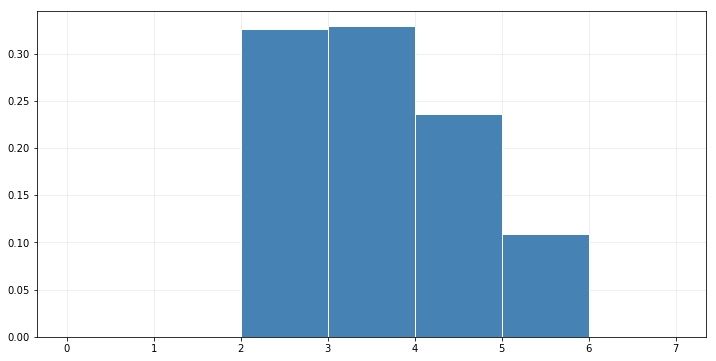

In [37]:
plinkowbounds(1.5, 5.5, 10000, True)

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

In [40]:
x = plinkowbounds(1.5, 5.5, 100000, False)
print("Average winnings per game: ${}".format(x))

Average winnings per game: $3.12569


After 100,000 games, it would seem that the average walkaway is $3.12 (if we round down) or $3.13 (if we round up).

Therefore, if you were to charge $3.13 for every game played, after 100,000 games, you would both break even (because, you know, you as the facilitator of the game, are totally deserving of that extra cent). 

### Challenge Problem - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
